In [51]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
import matplotlib.cm as cm
from sklearn.model_selection import train_test_split

In [44]:
X_raw , y_raw = fetch_openml('mnist_784', version=1, return_X_y=True)

In [42]:
print(X_raw.shape)
print(y_raw.shape)

(70000, 784)
(70000,)


In [45]:
#Dataframes converted into numpy arrays
X_raw_np = X_raw.to_numpy()
y_raw_np = y_raw.to_numpy()

Exploring the data:

In [46]:
#Thought it'd be cool to see the images as a matrix

np.set_printoptions(linewidth=2000)
print(X_raw_np[0].reshape(28, 28))

[[  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   3.  18.  18.  18. 126. 136. 175.  26. 166. 255. 247. 127.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.  30.  36.  94. 154. 170. 253. 253. 253. 253. 253. 225. 172. 253. 242. 195.  64.   0.   0.   0.   0.]

Label is 5


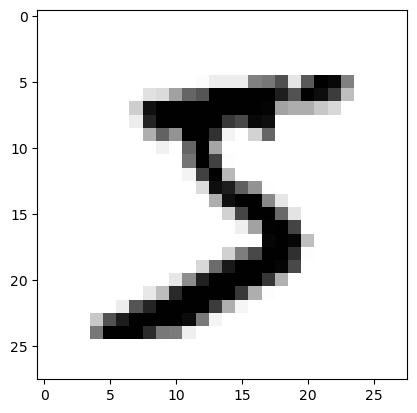

In [50]:
index=0

plt.imshow(X_raw_np[index].reshape(28,28), cmap=cm.binary)
print("Label is", y_raw_np[index])

End of exploration.

In [54]:
#Data split into 60% training, 20% validation & 20% test

X_train, X_temp, y_train, y_temp = train_test_split(X_raw_np, y_raw_np, test_size=0.4)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5)

In [60]:
#Checking dimensions

print("X_train =",X_train.shape)
print("y_train =",y_train.shape)
print("X_val =", X_val.shape)
print("y_val =", y_val.shape)
print("X_test =", X_test.shape)
print("y_test =", y_test.shape)

X_train = (42000, 784)
y_train = (42000,)
X_val = (14000, 784)
y_val = (14000,)
X_test = (14000, 784)
y_test = (14000,)


In [249]:
#changing values to between 0-1 
X_train, X_val, X_test = np.array(X_train/255), np.array(X_val/255), np.array(X_test/255)


# Changing y data into binary matricies such that each row is a vector with 0s and 1 which indicates the label.
# this is done so that a MSE error can be calulated while using sigmoid activation function for the output layer.


#y_train into binary matrix
y_train_binary = np.zeros((42000,10))

j = 0
for i in range(0, len(y_train)):
    


    if int(y_train[i]) == 0:
        
        y_train_binary[j] +=  np.array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0]) 
        j += 1

    elif int(y_train[i]) == 1:
        
        y_train_binary[j] +=  np.array([0, 1, 0, 0, 0, 0, 0, 0, 0, 0]) 
        j += 1

    elif int(y_train[i]) == 2:
        
        y_train_binary[j] +=  np.array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0]) 
        j += 1
    elif int(y_train[i]) == 3:
        
        y_train_binary[j] +=  np.array([0, 0, 0, 1, 0, 0, 0, 0, 0, 0]) 
        j += 1

    elif int(y_train[i]) == 4:
        
        y_train_binary[j] +=  np.array([0, 0, 0, 0, 1, 0, 0, 0, 0, 0]) 
        j += 1

    elif int(y_train[i]) == 5:
        
        y_train_binary[j] +=  np.array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0]) 
        j += 1
    elif int(y_train[i]) == 6:
        
        y_train_binary[j] +=  np.array([0, 0, 0, 0, 0, 0, 1, 0, 0, 0]) 
        j += 1

    elif int(y_train[i]) == 7:
        
        y_train_binary[j] +=  np.array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0]) 
        j += 1

    elif int(y_train[i]) == 8:
        
        y_train_binary[j] +=  np.array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0]) 
        j += 1

    elif int(y_train[i]) == 9:
        
        y_train_binary[j] +=  np.array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1]) 
        j += 1
    


        
#y_val into binary matrix
y_val_binary = np.zeros((14000,10))

j = 0
for i in range(0, len(y_val)):
    


    if int(y_val[i]) == 0:
        
        y_val_binary[j] +=  np.array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0]) 
        j += 1

    elif int(y_val[i]) == 1:
        
        y_val_binary[j] +=  np.array([0, 1, 0, 0, 0, 0, 0, 0, 0, 0]) 
        j += 1

    elif int(y_val[i]) == 2:
        
        y_val_binary[j] +=  np.array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0]) 
        j += 1
    elif int(y_val[i]) == 3:
        
        y_val_binary[j] +=  np.array([0, 0, 0, 1, 0, 0, 0, 0, 0, 0]) 
        j += 1

    elif int(y_val[i]) == 4:
        
        y_val_binary[j] +=  np.array([0, 0, 0, 0, 1, 0, 0, 0, 0, 0]) 
        j += 1

    elif int(y_val[i]) == 5:
        
        y_val_binary[j] +=  np.array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0]) 
        j += 1
    elif int(y_val[i]) == 6:
        
        y_val_binary[j] +=  np.array([0, 0, 0, 0, 0, 0, 1, 0, 0, 0]) 
        j += 1

    elif int(y_val[i]) == 7:
        
        y_val_binary[j] +=  np.array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0]) 
        j += 1

    elif int(y_val[i]) == 8:
        
        y_val_binary[j] +=  np.array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0]) 
        j += 1

    elif int(y_val[i]) == 9:
        
        y_val_binary[j] +=  np.array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1]) 
        j += 1



#y_test into binary matrix
y_test_binary = np.zeros((14000,10))

j = 0
for i in range(0, len(y_test)):
    


    if int(y_test[i]) == 0:
        
        y_test_binary[j] +=  np.array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0]) 
        j += 1

    elif int(y_test[i]) == 1:
        
        y_test_binary[j] +=  np.array([0, 1, 0, 0, 0, 0, 0, 0, 0, 0]) 
        j += 1

    elif int(y_test[i]) == 2:
        
        y_test_binary[j] +=  np.array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0]) 
        j += 1
    elif int(y_test[i]) == 3:
        
        y_test_binary[j] +=  np.array([0, 0, 0, 1, 0, 0, 0, 0, 0, 0]) 
        j += 1

    elif int(y_test[i]) == 4:
        
        y_test_binary[j] +=  np.array([0, 0, 0, 0, 1, 0, 0, 0, 0, 0]) 
        j += 1

    elif int(y_test[i]) == 5:
        
        y_test_binary[j] +=  np.array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0]) 
        j += 1
    elif int(y_test[i]) == 6:
        
        y_test_binary[j] +=  np.array([0, 0, 0, 0, 0, 0, 1, 0, 0, 0]) 
        j += 1

    elif int(y_test[i]) == 7:
        
        y_test_binary[j] +=  np.array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0]) 
        j += 1

    elif int(y_test[i]) == 8:
        
        y_test_binary[j] +=  np.array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0]) 
        j += 1

    elif int(y_test[i]) == 9:
        
        y_test_binary[j] +=  np.array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1]) 
        j += 1



#### **NN begins**

##### In this implementation everything is manually coded.

##### NN specification:

L = 4, L1 has 784 neurons, 2 hidden layers have 16 neurons each and the output layer has 10, one for each digit.


W2 has dimensions 16 x 784 <br>
W3 has dimensions 16 x 16 <br>
W4 has dimensions 10 x 16 <br>

b2-3 has dimensions 16 x 1 <br>
b4 has dimensions 10 x 1 <br>


##### Procedure:
1. Manually generate all weight matricies and biases then initalize randomly 

***

2. Split data into mini batches
3. Feedforward a single training example from a given batch
4. Calulate cost 
5. Backprop and calulate the gradient

***

6. Repeat steps 3-5 for all images in first batch

***

7. Average the gradient of the cost for all images in the first batch
8. apply gradient decent step to update the weights

***

9. Repeat 3-8 for all minibatches

***
10. shuffle data
11. Repeat 2-9 for a given number of 'epochs' 



In [284]:
#Creating and initializing matricies & biases randomly to values between -5 - 5

#W2 = np.random.uniform(low = -5,high= 5,size =(16, 784))
#W3 = np.random.uniform(low = -5,high= 5,size =(16, 16))
#W4 = np.random.uniform(low = -5,high= 5,size =(10, 16))

#b2 = np.random.uniform(low = -5,high= 5,size =(16, 1))
#b3 = np.random.uniform(low = -5,high= 5,size =(16, 1))
#b4 = np.random.uniform(low = -5,high= 5,size =(10, 1))




160

In [308]:
# Function for shuffling and creating mini batches by turning X and y into tensors
from sklearn.utils import shuffle


def create_mini_batch(X_input, y_input, mini_batch_size):

    X_shuffled, y_shuffled = shuffle(X_input, y_input)

    reshaped_dim = int(len(X_shuffled)/mini_batch_size)

    X_minibatches_tensor = X_shuffled.reshape(reshaped_dim, mini_batch_size,  X_shuffled.shape[1] )

    y_minibatches_tensor = y_shuffled.reshape(reshaped_dim, mini_batch_size,  y_shuffled.shape[1])


    return X_minibatches_tensor, y_minibatches_tensor


# The above function outputs a X tensor such that each matrix being a mini batch with each row being an image
# it outputs y a 3 tendor with the input being the y binary matricies. the matricies of the tensor are a given minibatch
#  and the rows are the labels of each image. 


In [309]:
# Activation function
def sigmoid(z):
    return 1.0/(1.0 + np.exp(-z))

# Derivative of sigmoid 
def sigmoid_prime(z):
    return sigmoid(z)*(1.0-sigmoid(z))

In [310]:
# Feedsforward one layer and outputs Z and activations of the next layer. 
def feedforward(a, W, b):
    Z_l = np.dot(W, a) + b
    A_l = sigmoid(Z_l)

    return Z_l, A_l 

#input data X needs to be fed in column vec form .reshape(784, 1)

In [311]:
#MSE cost function

def Cost_per_example(a_L, Y):
    e2 = ((a_L - Y)**2)/2
    cost = e2.sum()
    return cost



In [312]:
#Backpropagation

def backprop(X, Y, W2, W3, W4, B2, B3, B4, batch_no, example_no):

    
    Z_2, a_2 = feedforward(X[batch_no][example_no].reshape(784,1), W2, B2)
    Z_3, a_3 = feedforward(a_2, W3, B3)
    Z_L, a_L = feedforward(a_3, W4, B4)

    delta_L = np.multiply(((a_L - Y[batch_no][example_no].reshape(10,1))**2), sigmoid_prime(Z_L))
    delta_3 = np.multiply(np.dot(W4.T, delta_L), sigmoid_prime(Z_3))
    delta_2 = np.multiply(np.dot(W3.T, delta_3), sigmoid_prime(Z_2))

    #creating derivatives of cost w.r.t weight matricies

    d_W4 = np.zeros((10, 16))
    for j in range(10):
        for k in range(16):
            d_W4[j][k] += delta_L[j]*a_3[k]

    d_W3 = np.zeros((16, 16))
    for j in range(16):
        for k in range(16):
            d_W3[j][k] += delta_3[j]*a_2[k]


    d_W2 = np.zeros((16, 784))
    for j in range(16):
        for k in range(784):
            d_W2[j][k] += delta_2[j]*X[batch_no][example_no].reshape(784,1)[k]


    d_b4, d_b3, d_b2 = delta_L, delta_3, delta_2


    return d_W2, d_W3, d_W4, d_b2, d_b3, d_b4

In [313]:
#Function that updates the weights using gradient decent 

def update_weights(X, Y, W2, W3, W4, B2, B3, B4, batch_no, batch_size, learning_rate):

    d_W2_av = np.zeros(W2.shape)
    d_W3_av = np.zeros(W3.shape)
    d_W4_av = np.zeros(W4.shape)

    d_b2_av = np.zeros(B2.shape)
    d_b3_av = np.zeros(B3.shape)
    d_b4_av = np.zeros(B4.shape)


    for example_no in range(batch_size):
        d_W2_t, d_W3_t, d_W4_t, d_b2_t, d_b3_t, d_b4_t = backprop(X, Y, W2, W3, W4, B2, B3, B4, batch_no, example_no)

        d_W2_av += d_W2_t
        d_W3_av += d_W3_t
        d_W4_av += d_W4_t

        d_b2_av += d_b2_t
        d_b3_av += d_b3_t
        d_b4_av += d_b4_t

    d_W2_av = d_W2_av/batch_size
    d_W3_av = d_W3_av/batch_size
    d_W4_av = d_W4_av/batch_size

    d_b2_av = d_b2_av/batch_size
    d_b3_av = d_b3_av/batch_size
    d_b4_av = d_b4_av/batch_size


    W2_updated = W2 - learning_rate*d_W2_av
    W3_updated = W3 - learning_rate*d_W3_av
    W4_updated = W4 - learning_rate*d_W4_av

    b2_updated = B2 - learning_rate*d_b2_av
    b3_updated = B3 - learning_rate*d_b3_av
    b4_updated = B4 - learning_rate*d_b4_av 

    return W2_updated, W3_updated, W4_updated, b2_updated, b3_updated, b4_updated 


In [319]:
#run network for n epoches and output error 

def run(X_in, Y_in, epochs, learning_rate, mini_batch_size):


    W2 = np.random.uniform(low = -5,high= 5,size =(16, 784))
    W3 = np.random.uniform(low = -5,high= 5,size =(16, 16))
    W4 = np.random.uniform(low = -5,high= 5,size =(10, 16))

    b2 = np.random.uniform(low = -5,high= 5,size =(16, 1))
    b3 = np.random.uniform(low = -5,high= 5,size =(16, 1))
    b4 = np.random.uniform(low = -5,high= 5,size =(10, 1))


    

    

    for ep in range(epochs):

        #shuffle data & generate mini batches

        X, Y = create_mini_batch(X_in, Y_in, mini_batch_size)
        cost_1 = 0
        correct = 0
        cost_array = []

        for batch_n in range(int(len(X_in)/mini_batch_size)):

            #gradient decent step here

            W2, W3, W4, b2, b3, b4 = update_weights(X, Y, W2, W3, W4, b2, b3, b4, batch_n, mini_batch_size, learning_rate)

            for example_num in range(mini_batch_size):

                Z_2, a_2 = feedforward(X[batch_n][example_num].reshape(784,1), W2, b2)
                Z_3, a_3 = feedforward(a_2, W3, b3)
                Z_L, a_L = feedforward(a_3, W4, b4)


                cost_1 += Cost_per_example(a_L, Y[batch_n][example_num])/mini_batch_size
                
                if np.argmax(a_L) == np.argmax(Y[batch_n][example_num]):
                    correct += 1
                
                
                
                
        print("Epoch",ep,"Cost:", cost_1)
        cost_array.append(cost_1)


        print("Epoch", ep,"Percentage: ", correct,"/", X_in.shape[0])

    

    return  W2, W3, W4, b2, b3, b4, cost_array



In [321]:
W2_new, W3_new, W4_new, b2_new, b3_new, b4_new, cost_array = run(X_train, y_train_binary, 10, 3.0, 10)

KeyboardInterrupt: 

In [ ]:
def test(X, Y, W2, W3, W4, b2, b3, b4):

    correct = 0

    for example_num in range(X.shape[0]):

        Z_2, a_2 = feedforward(X[batch_n][example_num].reshape(784,1), W2, b2)
        Z_3, a_3 = feedforward(a_2, W3, b3)
        Z_L, a_L = feedforward(a_3, W4, b4)


        if np.argmax(a_L) == np.argmax(Y[example_num]):
            correct += 1


    print("Correct =", correct, "/", X.shape[0])
    print("Percentage correct = ", (correct/X.shape[0])*100)

    